In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [31]:
data=pd.read_csv('column_2C_weka.csv')

In [32]:
data.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal


Abnormal    0.677419
Normal      0.322581
Name: class, dtype: float64


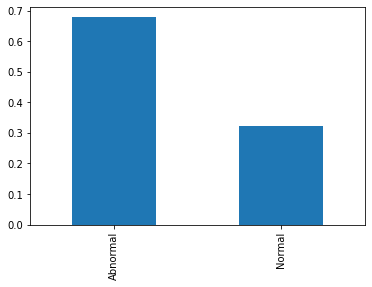

In [33]:
print(data['class'].value_counts(normalize=True))
data['class'].value_counts(normalize=True).plot(kind='bar')

In [34]:
data['class']=data['class'].replace({'Abnormal':1,'Normal':0})

In [35]:
out=data['class']
inp=data.drop('class',1)

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_mod=KNeighborsClassifier()
knn_mod.fit(xtrain,ytrain)
ypred=knn_mod.predict(xtest)

In [38]:
knn_mod

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
from sklearn.metrics import classification_report,accuracy_score

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.92      0.86      0.89        66

    accuracy                           0.85        93
   macro avg       0.81      0.84      0.82        93
weighted avg       0.86      0.85      0.85        93



In [27]:
test=xtest.iloc[0,:].values.reshape(1,-1)

In [28]:
knn_mod.kneighbors(test)

(array([[ 7.34218532, 11.18923883, 11.39924297, 12.33363933, 13.20230054]]),
 array([[ 13, 168, 210,  86, 111]], dtype=int64))

In [13]:
train_acc=[]
test_acc=[]
neig=np.arange(1,21)
for k in neig:
    knn_mod=KNeighborsClassifier(n_neighbors=k)
    knn_mod.fit(xtrain,ytrain)
    ypred_test=knn_mod.predict(xtest)
    ypred_train=knn_mod.predict(xtrain)
    train_acc.append(accuracy_score(ytrain,ypred_train))
    test_acc.append(accuracy_score(ytest,ypred_test))

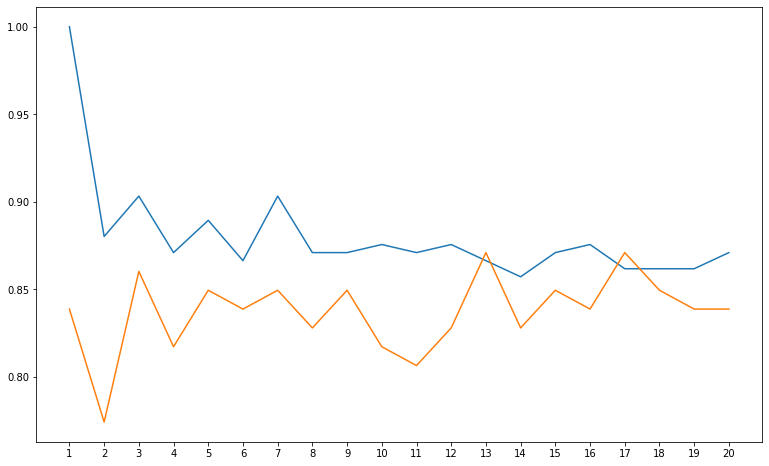

In [14]:
plt.figure(figsize=(13,8))
plt.xticks(neig)
plt.plot(neig,train_acc)
plt.plot(neig,test_acc)

In [15]:
knn_mod

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [16]:
from sklearn.model_selection import GridSearchCV

In [118]:
mod=KNeighborsClassifier()

In [119]:
params={'n_neighbors':[3,5,7,9,11,13,15],'metric':['minkowski'],'p':[1,2,3,4,5,6],'weights':['uniform','distance']}

In [120]:
hyp_mod=GridSearchCV(mod,param_grid=params,scoring='accuracy',return_train_score=True)

In [122]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [123]:
tun_mod.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [124]:
tun_mod.best_score_

0.8526427061310782

In [128]:
pd.DataFrame(tun_mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003198,0.001469,0.005396,0.001200,minkowski,3,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.818182,...,0.847780,0.043121,7,0.936416,0.890173,0.913793,0.925287,0.908046,0.914743,0.015686
1,0.000400,0.000799,0.000209,0.000418,minkowski,3,1,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.818182,...,0.843129,0.045213,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.003125,0.006249,0.000000,0.000000,minkowski,3,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.772727,...,0.815751,0.040888,47,0.901734,0.890173,0.908046,0.890805,0.902299,0.898611,0.006993
3,0.003125,0.006250,0.000000,0.000000,minkowski,3,2,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.772727,...,0.811099,0.044625,54,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.006251,0.007656,0.007550,0.007007,minkowski,3,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.772727,...,0.797357,0.036370,77,0.884393,0.890173,0.908046,0.879310,0.908046,0.893994,0.011977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.003125,0.006250,0.006250,0.007654,minkowski,15,4,distance,"{'metric': 'minkowski', 'n_neighbors': 15, 'p'...",0.840909,...,0.847992,0.031159,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
80,0.000000,0.000000,0.006250,0.007655,minkowski,15,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 15, 'p'...",0.840909,...,0.852643,0.040076,1,0.878613,0.867052,0.850575,0.867816,0.879310,0.868673,0.010420
81,0.003125,0.006250,0.000000,0.000000,minkowski,15,5,distance,"{'metric': 'minkowski', 'n_neighbors': 15, 'p'...",0.840909,...,0.847992,0.031159,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
82,0.009374,0.007654,0.000000,0.000000,minkowski,15,6,uniform,"{'metric': 'minkowski', 'n_neighbors': 15, 'p'...",0.840909,...,0.838689,0.014820,16,0.867052,0.867052,0.850575,0.862069,0.867816,0.862913,0.006500


In [161]:
final_mod=KNeighborsClassifier(**tun_mod.best_params_)
final_mod.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [164]:
import pickle
#my_mod=pickle.dumps(final_mod)

In [171]:
pickle.dump(final_mod,open("my_mod.pkl","wb"))

In [172]:
mod2=pickle.load(open("my_mod.pkl","rb"))

In [173]:
mod2.predict(xtest)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1], dtype=int64)

In [174]:
mod2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')